 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_data = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_data, index_col = "Date", infer_datetime_format = True, parse_dates = True)
whale_returns = whale_returns.sort_index()
whale_returns.head()


/var/folders/cp/yd9whbw50ng6k5r1tb2hs4t00000gq/T/ipykernel_61166/3707489055.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_returns = pd.read_csv(whale_returns_data, index_col = "Date", infer_datetime_format = True, parse_dates = True)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_data = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_data, index_col = "Date", infer_datetime_format = True, parse_dates = True)
algo_returns = algo_returns.sort_index()
algo_returns.head()

/var/folders/cp/yd9whbw50ng6k5r1tb2hs4t00000gq/T/ipykernel_61166/320540859.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo_returns = pd.read_csv(algo_returns_data, index_col = "Date", infer_datetime_format = True, parse_dates = True)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.head()


,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_hist_data = Path("Resources/sp500_history.csv")
sp500_hist = pd.read_csv(sp500_hist_data, index_col = "Date", infer_datetime_format = True, parse_dates = True)
sp500_hist = sp500_hist.sort_index()
sp500_hist.head()

/var/folders/cp/yd9whbw50ng6k5r1tb2hs4t00000gq/T/ipykernel_61166/3638883265.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp500_hist = pd.read_csv(sp500_hist_data, index_col = "Date", infer_datetime_format = True, parse_dates = True)
/var/folders/cp/yd9whbw50ng6k5r1tb2hs4t00000gq/T/ipykernel_61166/3638883265.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_hist = pd.read_csv(sp500_hist_data, index_col = "Date", infer_datetime_format = True, parse_dates = True)


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_hist.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
#sp500_hist['Date'] = pd.to_datetime(sp500_hist['Date'])
sp500_hist['Close'] = sp500_hist['Close'].str.replace('$', '').astype(float)
sp500_hist.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [11]:
# Calculate Daily Returns
sp500_daily_returns = sp500_hist.pct_change()

In [12]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns = sp500_daily_returns.rename(columns={"Close":"SP500"})
sp500_daily_returns.head()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

In [15]:

sp500_returns = sp500_hist.pct_change()
sp500_returns.dropna()
all_returns = pd.concat([sp500_returns,algo_returns, whale_returns], axis="columns", join="inner")
#all_returns = all_returns.drop(columns=['Date'])
#all_returns.columns = ['Whale_Return', 'Algo_Return', 'S&P 500_Return']
all_returns = all_returns.rename(columns={"Close":"SP500"})
all_returns.head(8)

,SP500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.004539,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.004389,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.001196,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.014174,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.003944,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.016961,-0.001392,-0.012155,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,-0.001918,0.002994,0.000605,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.012601,-0.002935,0.011667,0.008265,0.010272,0.013117,0.010801


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'All Portfolios Daily Returns'}, xlabel='Date'>

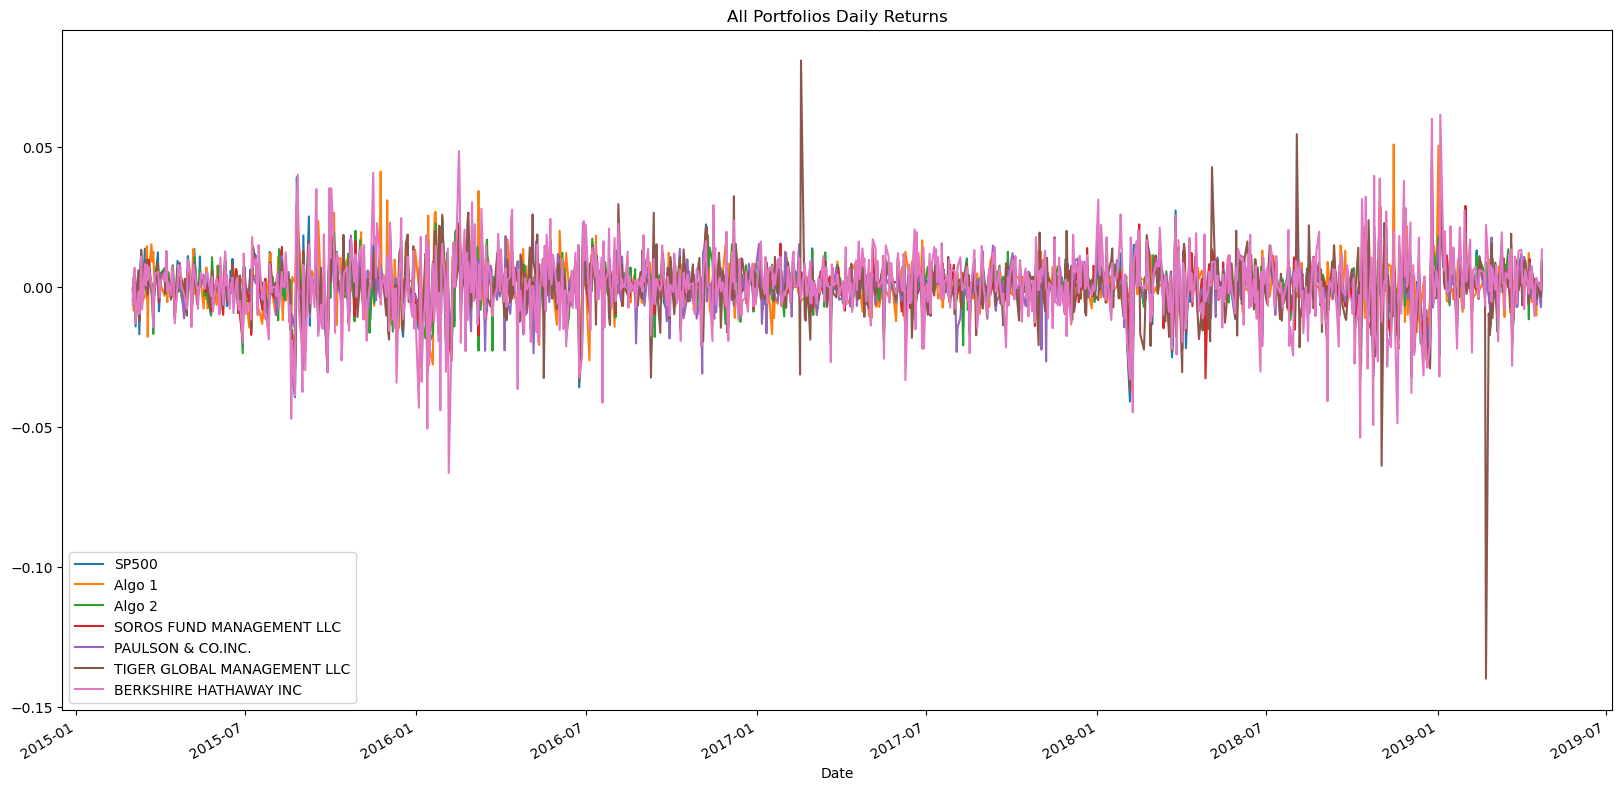

In [16]:
# Plot daily returns of all portfolios

all_returns.plot(figsize = (20,10), title = "All Portfolios Daily Returns")

#### Calculate and Plot cumulative returns.

<Axes: title={'center': 'Cumulative Returns of All Portfolios'}, xlabel='Date'>

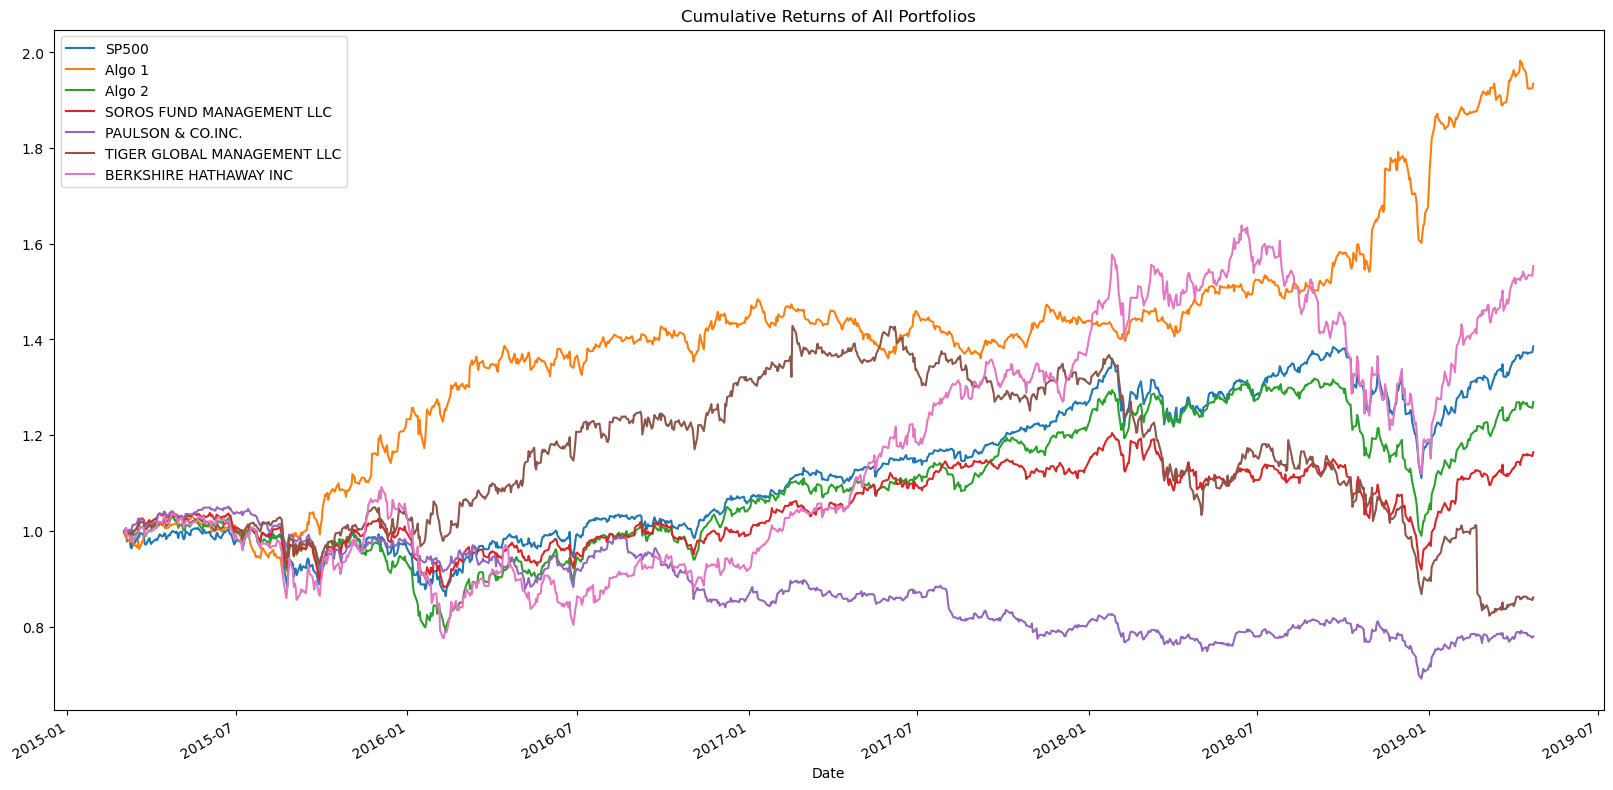

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_returns).cumprod() 

# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns of All Portfolios")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: title={'center': 'ALL Portfolio Returns'}>

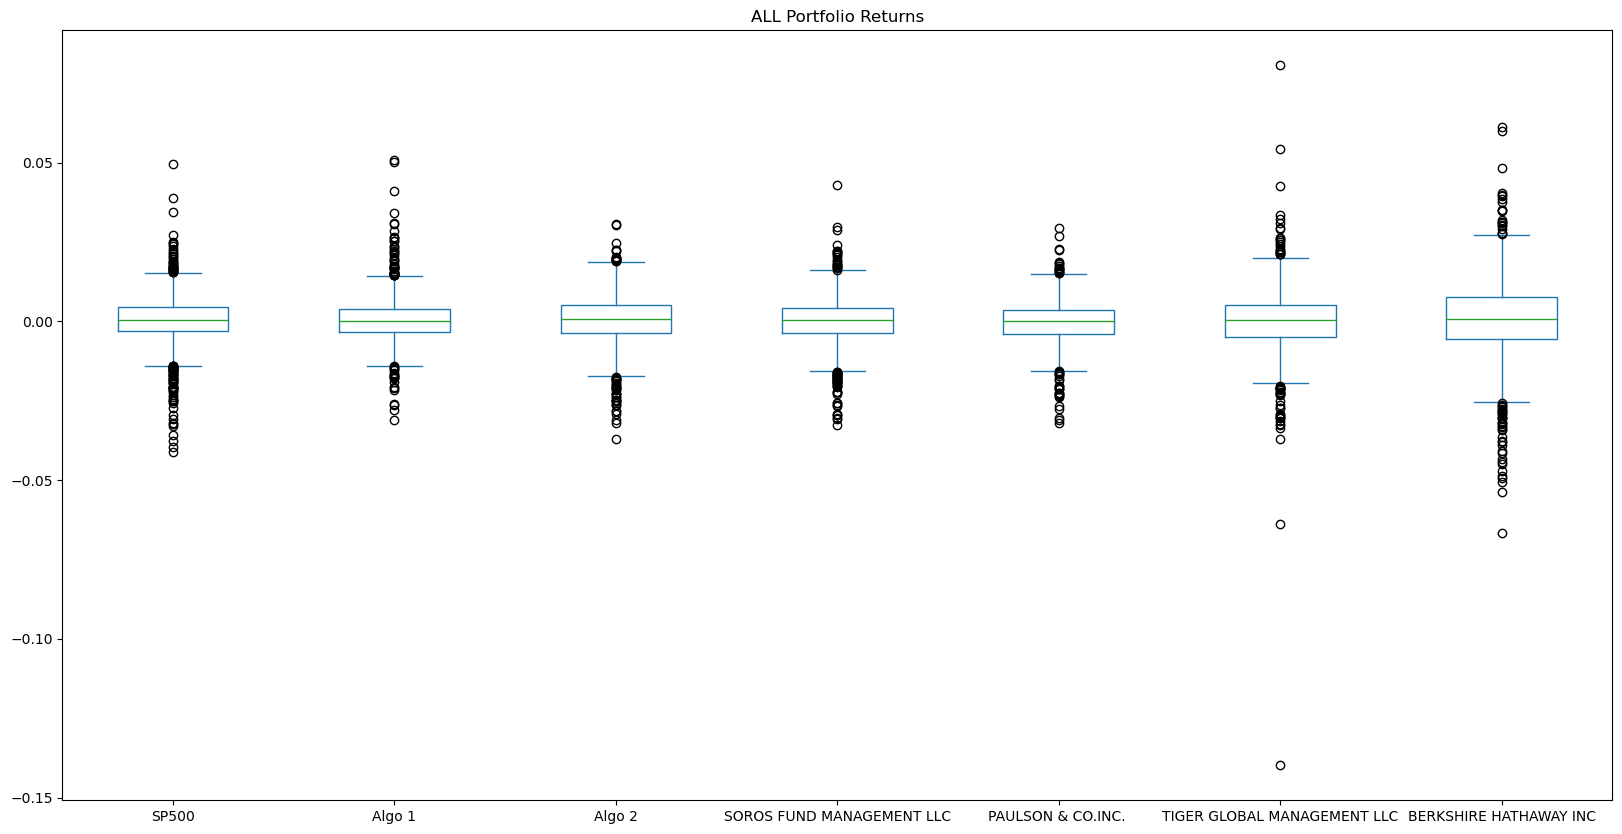

In [18]:
# Box plot to visually show risk
all_returns.plot(kind='box', figsize=(20,10), title= "ALL Portfolio Returns")

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
all_daily_std = all_returns.std()

all_daily_std

SP500                          0.008554
Algo 1                         0.007620
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate  the daily standard deviation of S&P 500
sp500_daily_std = all_returns["SP500"].std()
sp500_daily_std

# Determine which portfolios are riskier than the S&P 500
print("Standard deviation of all portfolios:\n", all_daily_std)
print("\nStandard deviation of S&P 500:\n", sp500_daily_std)

Standard deviation of all portfolios:
 SP500                          0.008554
Algo 1                         0.007620
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

Standard deviation of S&P 500:
 0.008553731597758204


In [21]:
all_returns.std() > sp500_daily_std


SP500                          False
Algo 1                         False
Algo 2                         False
SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
dtype: bool

### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std_dev = all_daily_std * np.sqrt(252)
annualized_std_dev

SP500                          0.135786
Algo 1                         0.120967
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

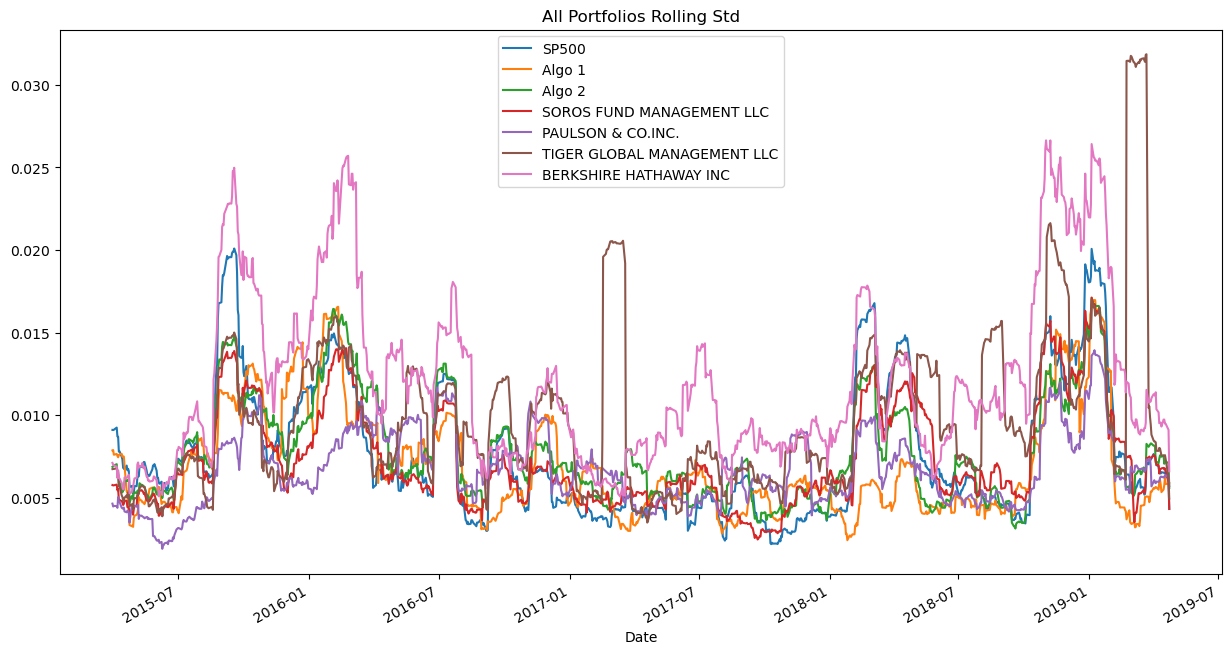

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_rolling_std = all_returns.rolling(window=21).std()


# Plot the rolling standard deviation
ax = all_rolling_std.plot(figsize=(15, 8), title = "All Portfolios Rolling Std")

### Calculate and plot the correlation

<Axes: >

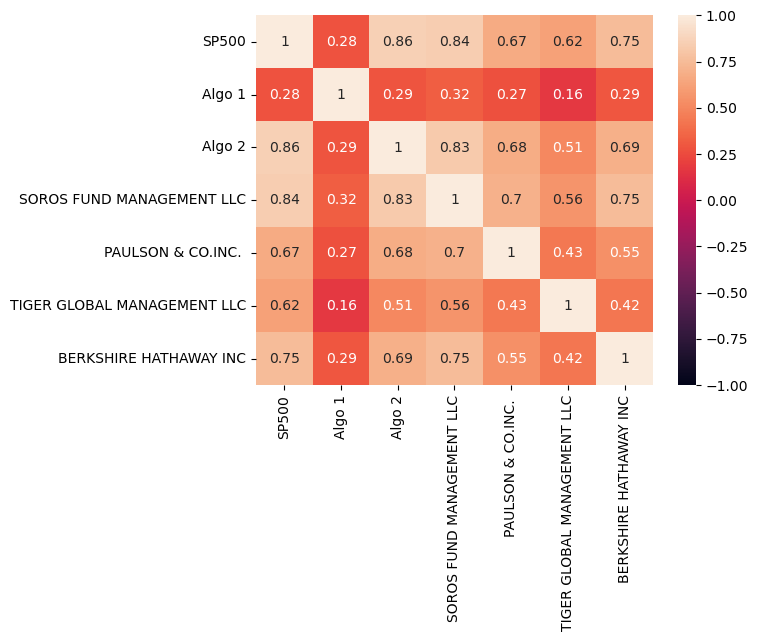

In [24]:
# Calculate the correlation
correlation = all_returns.corr()

# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1, annot = True,)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: title={'center': 'SP500 Beta'}, xlabel='Date'>

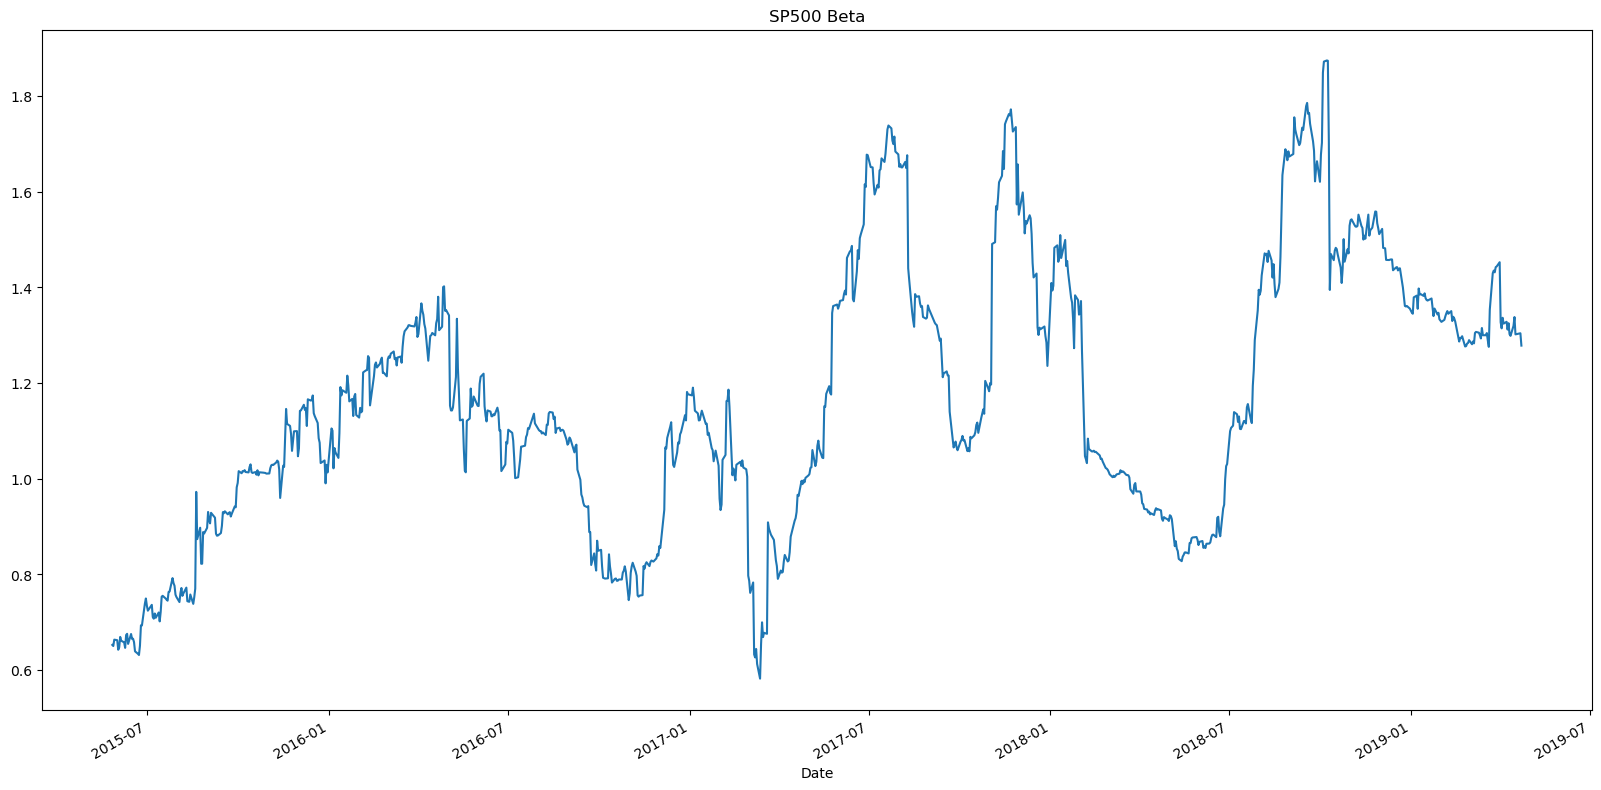

In [25]:
# Calculate covariance of a single portfolio
berkshire_cov = all_returns['BERKSHIRE HATHAWAY INC'].rolling(window =60).cov(all_returns['SP500'])
berkshire_cov

# Calculate variance of S&P 500
variance_sp500 = all_returns['SP500'].rolling(window=60).var()

# Computing beta
sp500_beta = berkshire_cov / variance_sp500

# Plot beta trend
sp500_beta.plot(figsize = (20,10), title = "SP500 Beta")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: title={'center': 'Exponentially Weighted Average'}, xlabel='Date'>

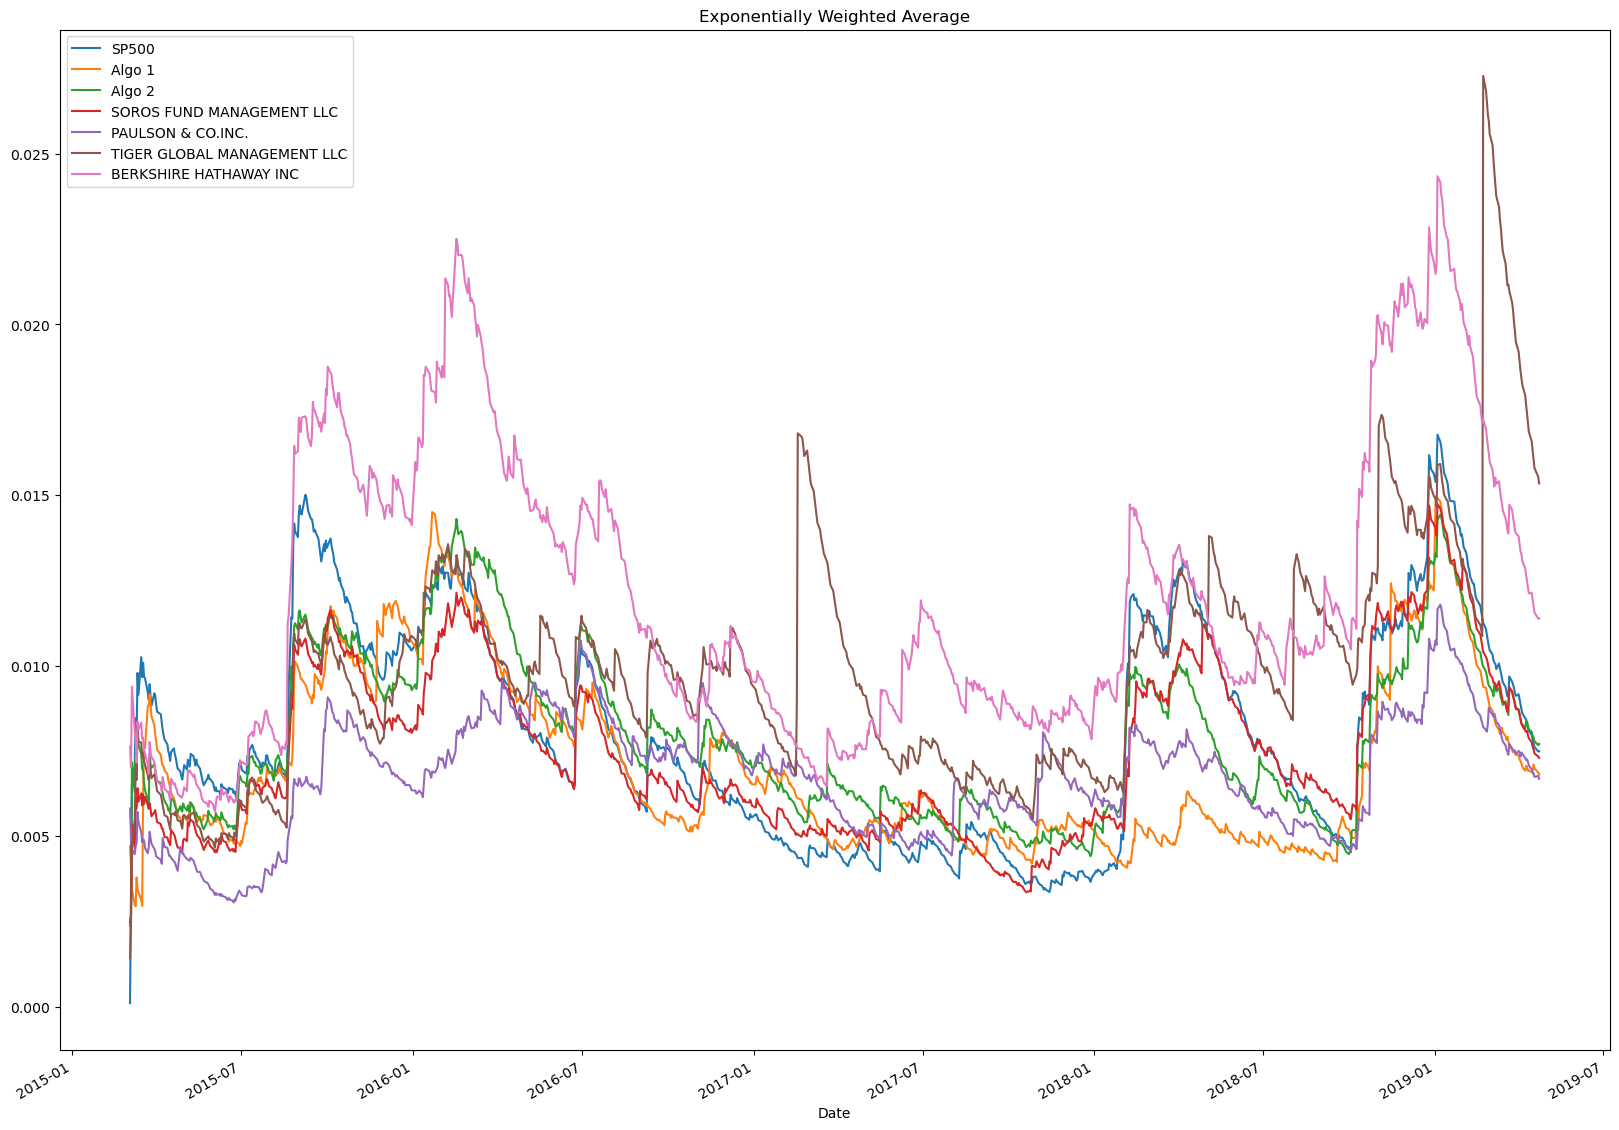

In [26]:
# Use `ewm` to calculate the rolling window
all_returns.ewm(halflife = 21).std().plot(figsize = (20,15), title = "Exponentially Weighted Average")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [27]:
# Annualized Sharpe Ratios
annualized_sharpe = all_returns.mean() * 252 /( all_returns.std() * np.sqrt(252))
annualized_sharpe

SP500                          0.648267
Algo 1                         1.378648
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
dtype: float64

<Axes: title={'center': 'Annualized Sharpe Ratios'}>

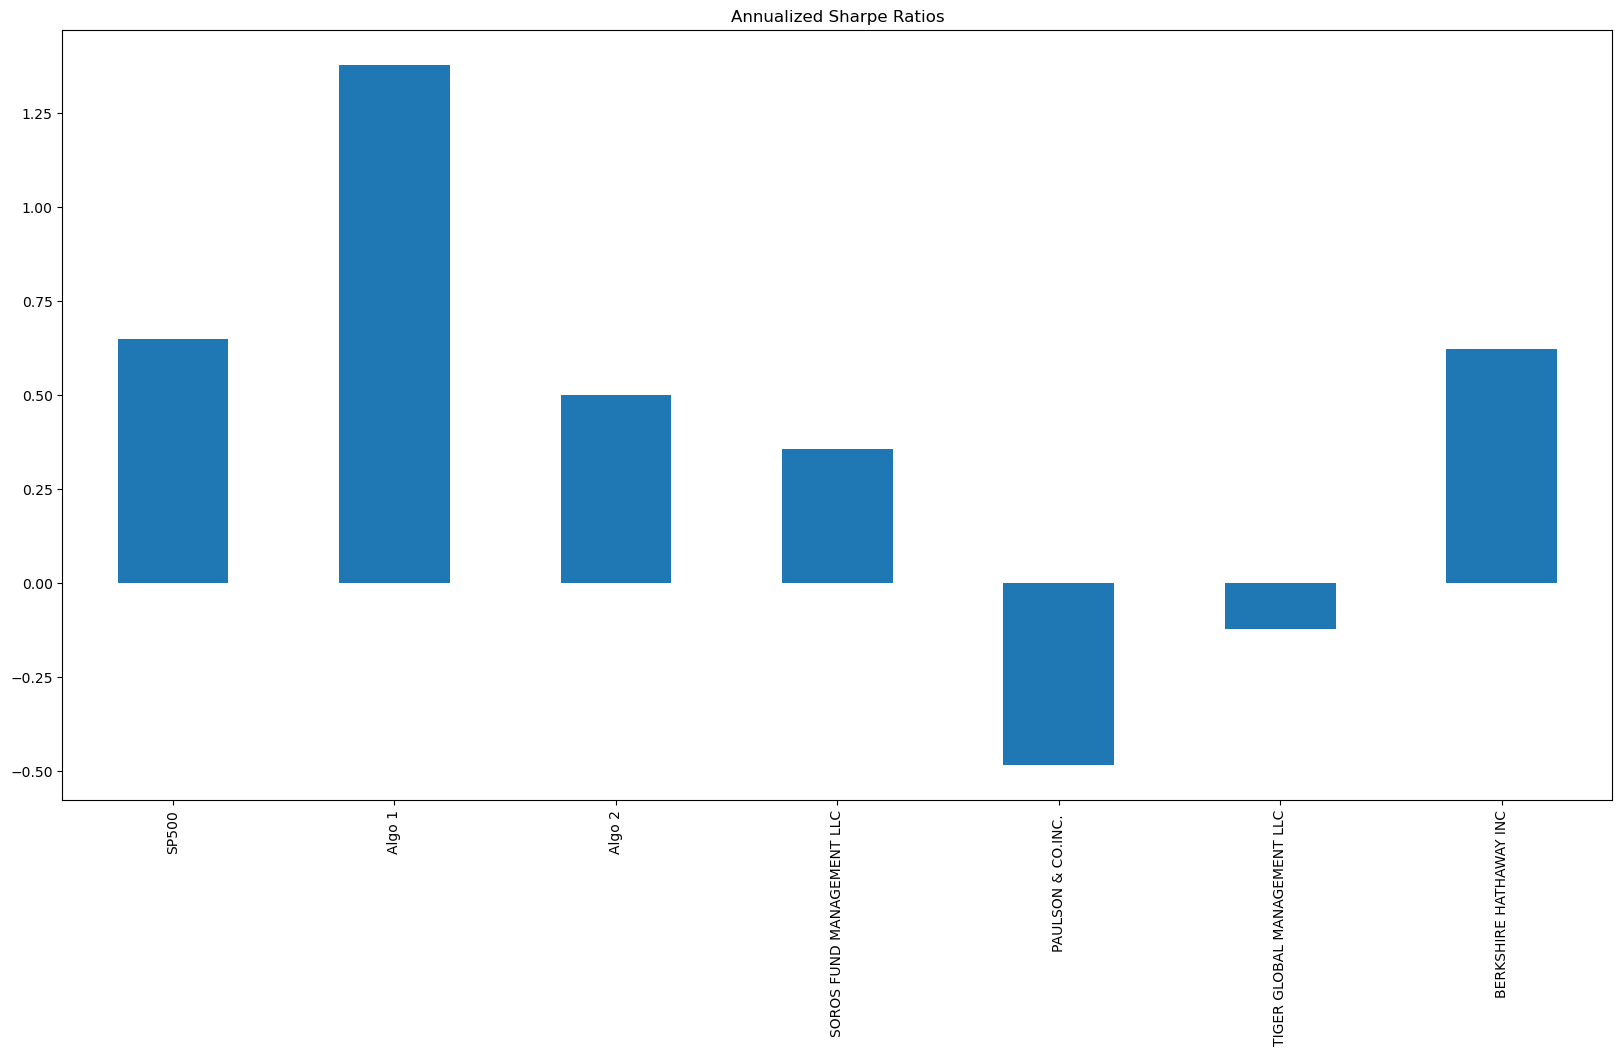

In [28]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe.plot(kind = 'bar', figsize = (20,10), title = "Annualized Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [29]:
# Reading data from 1st stock
ccl_csv = Path("Resources/CCL-3.csv")
ccl_df = pd.read_csv(ccl_csv,index_col = "Date",infer_datetime_format = True, parse_dates = True)

ccl_df = ccl_df.rename(columns={"Close":"CCL"})
ccl_df = ccl_df.sort_index()
ccl_df.head()

/var/folders/cp/yd9whbw50ng6k5r1tb2hs4t00000gq/T/ipykernel_61166/4144395168.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  ccl_df = pd.read_csv(ccl_csv,index_col = "Date",infer_datetime_format = True, parse_dates = True)


,CCL
Date,
2014-03-03,38.52
2014-03-04,39.62
2014-03-05,39.28
2014-03-06,39.19
2014-03-07,39.50


In [30]:
# Reading data from 2nd stock
aapl_csv = Path("Resources/AAPL-3.csv")
aapl_df = pd.read_csv(aapl_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True)
aapl_df = aapl_df.rename(columns = {"Close":"AAPL"})
aapl_df = aapl_df.sort_index()
aapl_df.head()

/var/folders/cp/yd9whbw50ng6k5r1tb2hs4t00000gq/T/ipykernel_61166/3344527622.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  aapl_df = pd.read_csv(aapl_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True)


,AAPL
Date,
2014-03-03,18.85
2014-03-04,18.97
2014-03-05,19.01
2014-03-06,18.96
2014-03-07,18.94


In [31]:
# Reading data from 3rd stock
nvda_csv = Path("Resources/NVDA-3.csv")
nvda_df = pd.read_csv(nvda_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True)
nvda_df = nvda_df.rename(columns={"Close":"NVDA"})
nvda_df = nvda_df.sort_index()
nvda_df.head()

/var/folders/cp/yd9whbw50ng6k5r1tb2hs4t00000gq/T/ipykernel_61166/645794382.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  nvda_df = pd.read_csv(nvda_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True)


,NVDA
Date,
2014-03-03,4.57
2014-03-04,4.62
2014-03-05,4.66
2014-03-06,4.60
2014-03-07,4.59


In [32]:
# Combine all stocks in a single DataFrame
my_stocks = pd.concat([nvda_df, aapl_df, ccl_df], axis = 'columns', join = 'inner')
my_stocks.head()

,NVDA,AAPL,CCL
Date,,,
2014-03-03,4.57,18.85,38.52
2014-03-04,4.62,18.97,39.62
2014-03-05,4.66,19.01,39.28
2014-03-06,4.60,18.96,39.19
2014-03-07,4.59,18.94,39.50


In [33]:
# Reset Date index
my_stocks = my_stocks.sort_index()
my_stocks.head()

,NVDA,AAPL,CCL
Date,,,
2014-03-03,4.57,18.85,38.52
2014-03-04,4.62,18.97,39.62
2014-03-05,4.66,19.01,39.28
2014-03-06,4.60,18.96,39.19
2014-03-07,4.59,18.94,39.50


In [34]:
# Calculate daily returns
my_stocks_daily = my_stocks.pct_change()

# Drop NAs
my_stocks_daily.dropna()

# Display sample data

my_stocks_daily.head()

,NVDA,AAPL,CCL
Date,,,
2014-03-03,NaN,NaN,NaN
2014-03-04,0.010941,0.006366,0.028557
2014-03-05,0.008658,0.002109,-0.008582
2014-03-06,-0.012876,-0.002630,-0.002291
2014-03-07,-0.002174,-0.001055,0.007910


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

my_stocks_returns = my_stocks_daily.dot(weights)

# Display sample data
my_stocks_returns

Date
2014-03-03         NaN
2014-03-04    0.015288
2014-03-05    0.000728
2014-03-06   -0.005932
2014-03-07    0.001560
                ...   
2018-12-24   -0.026453
2018-12-26    0.048575
2018-12-27   -0.002608
2018-12-28    0.010283
2018-12-31    0.007189
Length: 1218, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Join your returns DataFrame to the original returns DataFrame
my_portfolio = my_stocks_returns 
all_returns['my_portfolio'] = my_portfolio
all_returns = all_returns.rename(columns={"my_portfolio":"My Portfolio"})
all_returns


,SP500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,My Portfolio
Date,,,,,,,,
2015-03-03,-0.004539,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,-0.008865
2015-03-04,-0.004389,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,0.000796
2015-03-05,0.001196,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.007514
2015-03-06,-0.014174,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.011979
2015-03-09,0.003944,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,0.006495
...,...,...,...,...,...,...,...,...
2019-04-16,0.000509,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837,NaN
2019-04-17,-0.002274,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222,NaN
2019-04-18,0.001579,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916,NaN


In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns.dropna()

,SP500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,My Portfolio
Date,,,,,,,,
2015-03-03,-0.004539,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,-0.008865
2015-03-04,-0.004389,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,0.000796
2015-03-05,0.001196,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.007514
2015-03-06,-0.014174,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.011979
2015-03-09,0.003944,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,0.006495
...,...,...,...,...,...,...,...,...
2018-12-24,-0.027112,-0.003938,-0.014745,-0.019152,-0.011786,-0.029165,-0.020181,-0.026453
2018-12-26,0.049594,0.022750,0.030822,0.042977,0.029338,0.030958,0.059909,0.048575
2018-12-27,0.008563,0.001571,0.000494,0.004184,-0.007472,0.009149,0.004813,-0.002608


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [38]:
# Calculate the annualized `std`
my_portfolio_std = my_portfolio.std()
my_portfolio_annualized = my_portfolio_std * np.sqrt(252)
my_portfolio_annualized

0.2234332847200467

### Calculate and plot rolling `std` with 21-day window

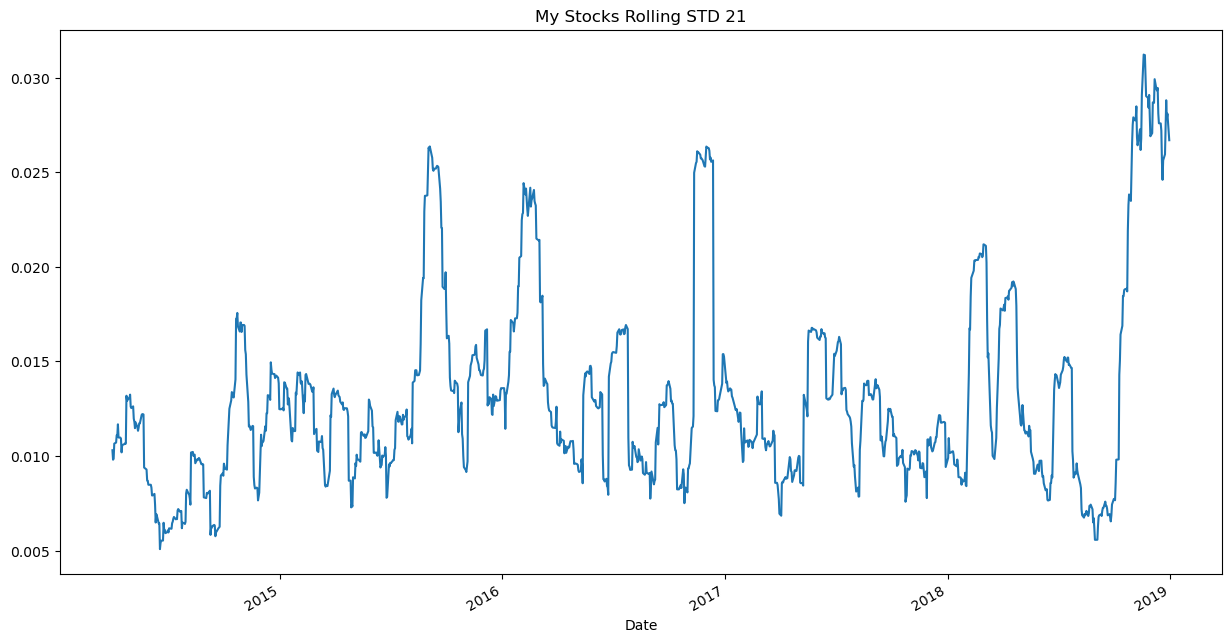

In [39]:
# Calculate rolling standard deviation
my_portfolio_rolling = my_portfolio.rolling(window = 21).std()

# Plot rolling standard deviation
ax = my_portfolio_rolling.plot(figsize=(15, 8), title = "My Stocks Rolling STD 21")

### Calculate and plot the correlation

<Axes: >

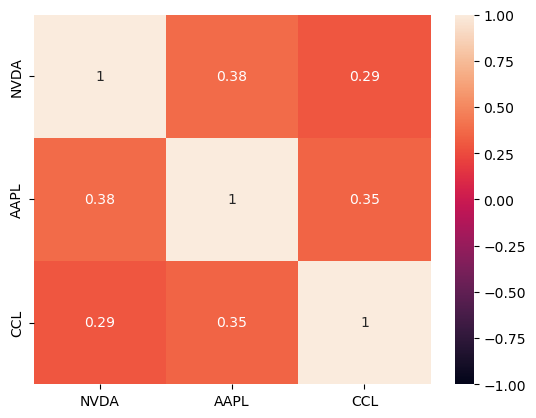

In [40]:
# Calculate and plot the correlation
my_portfolio_correlation = my_stocks_daily.corr()
sns.heatmap(my_portfolio_correlation, vmin=-1, vmax=1, annot = True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: title={'center': 'My Portfolio Beta'}, xlabel='Date'>

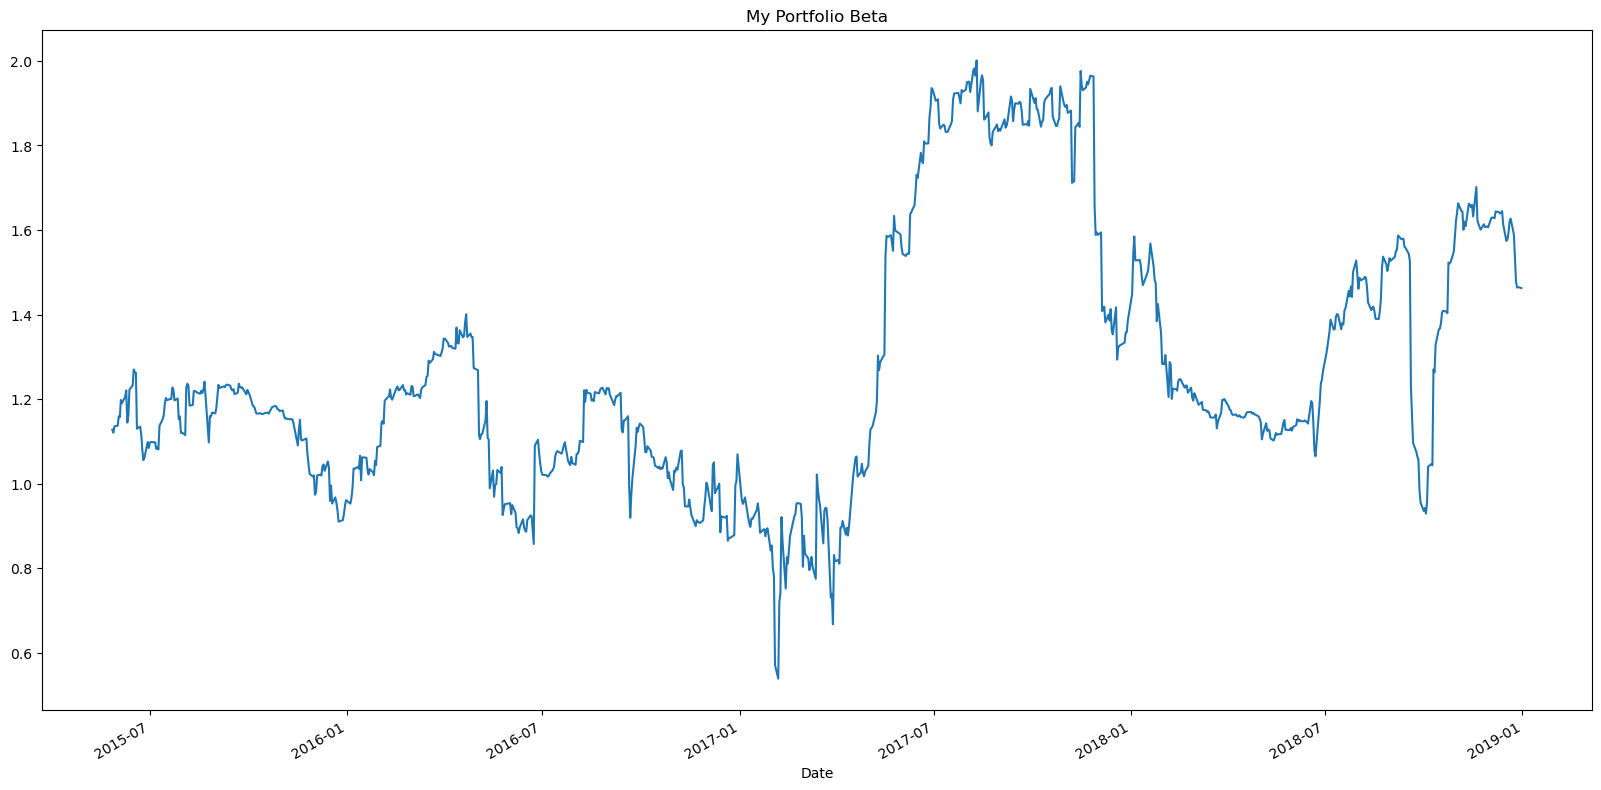

In [41]:
# Calculate and plot Beta
my_portfolio_cov = my_portfolio.rolling(window =60).cov(all_returns['SP500'])
my_portfolio_variance = all_returns['SP500'].rolling(window=60).var()
my_portfolio_beta = my_portfolio_cov / my_portfolio_variance
my_portfolio_beta.plot(figsize = (20,10), title = "My Portfolio Beta")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [42]:
# Calculate Annualized Sharpe Ratios
my_portfolio_annualized_sharpe = my_portfolio.mean() * 252 / (my_portfolio.std() * np.sqrt(252))
my_portfolio_annualized_sharpe


1.1252881930537908

<Axes: title={'center': 'All Portfolios Annualized Sharpe Ratios'}>

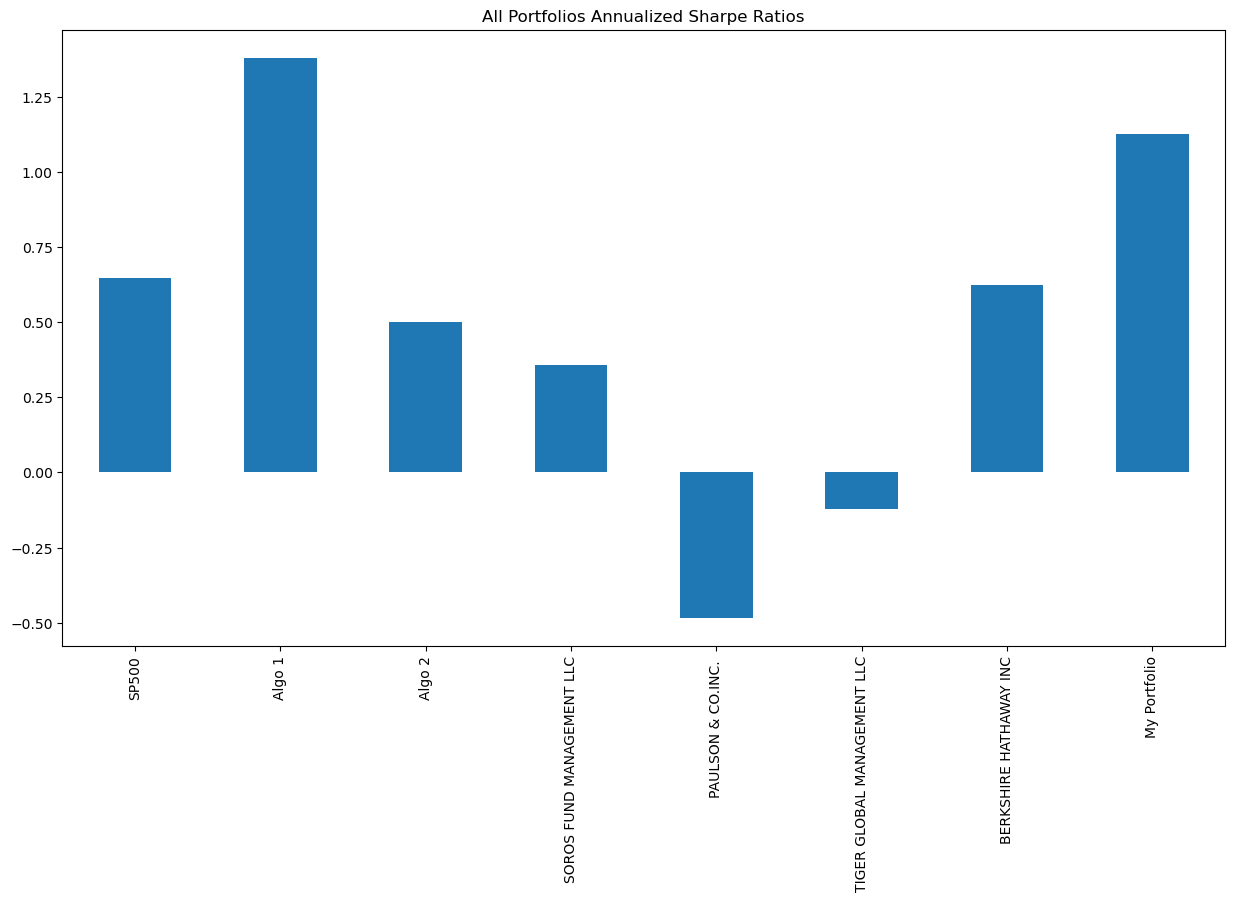

In [45]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe['My Portfolio'] = my_portfolio_annualized_sharpe

annualized_sharpe.plot(kind = 'bar', figsize = (15,8), title = "All Portfolios Annualized Sharpe Ratios")


### How does your portfolio do?

Write your answer here!

In [ ]:
# My porftolio is one of the better investments on a risk-adjusted basis compared to the other portfolios. 
# Beeing one of the better investment options considering the risk and return parameters I would recommend it over some of the portfolios.